# Sentiment Analysis and Data Visualization

## Introduction

### Summary
This project aimes to recognize the topics Small Business Owners and Startup owners discuss about on Reddit, their similarities, and differences. The results are targeted towards a Financial Institution, that is starting a new blog to attract companies at small size. This research investigates in what these two gruops differ for interest, and whether it might make sense to address them together or separately.


### In this Notebook
In this notebook I perform I run a sentiment analysis model to identify if there is a difference between the two subreddits and if that could actually be a part of my predictive model.

### Conclusion
I end up realizing the sentiment is the same across the two subreddits.
This indicates that the subreddits are comparable and the tone is equally informative.


### Notebook Index

- [01 | Data Collection](01_data_collection.ipynb)
- [02 | EDA & Cleaning](02_eda.ipynb)
- [03 | Model](03_model.ipynb)
- [04 | Sentiment Analysis](04_sentiment_analysis.ipynb)

In [134]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

pd.options.display.max_colwidth = 200

In [66]:
def custom_pallete(custom_colors):
    customPalette = sns.set_palette(sns.color_palette(custom_colors))
    sns.palplot(sns.color_palette(custom_colors),size=0.8)
    plt.tick_params(axis='both', labelsize=0, length = 0)

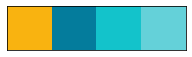

In [138]:
acqua = ["#84B099","#973276","#CA8D89", "#E4F3E0","#B5DEC8","#9CC7B0","#84B099","#CFB384","#F7BF7D","#CA8D89","#8959B9","#973276"]
contrast =["#E26D5C","#FFCD70", "#38618C", '#723D46', '#472D30']
project_3 = ["#F9B310","#047C9C","#13C3CB", "#64D1D9"]
custom_pallete(project_3)

In [59]:
df = pd.read_csv('../data/corpus_clean.csv')

In [60]:
df.dropna(subset=['alltext'], inplace=True)

In [61]:
corpus = list(df['alltext'])

To Run this analysis I use Sentiment Intensity Analyzer and in particular I measure the polarity Scores.

In [62]:
#instantiate SIA
sia = SentimentIntensityAnalyzer()

#Get polarity scores for the first tweet
sia.polarity_scores(corpus[0])

{'neg': 0.574, 'neu': 0.426, 'pos': 0.0, 'compound': -0.4019}

Run the sentiment analysis by scoring each value in `alltext` and return it as a dataframe.

In [63]:
sentiment = []    

for el in corpus:
    scores = sia.polarity_scores(el)
    scores['alltext'] = el
    sentiment.append(scores)

df_sentiment = pd.DataFrame(sentiment)
df_sentiment.head()

,neg,neu,pos,compound,alltext
0,0.574,0.426,0.000,-0.4019,gusto problem nan
1,0.000,0.880,0.120,0.8211,there way spread out windfall income over multiple year decrease tax margin business suddenly brings thousand time more income than ever ha one year through the sale very valuable asset there way ...
2,0.124,0.660,0.217,0.6678,eidl ppp credit denial thing ’ just today hearing from friend that both her business were denied because her low credit score this new news before applied used company improve score didn’ have any...
3,0.056,0.790,0.154,0.9239,like learn about getting clientele with momentum broke due this pandemic like lost everything broke have enough get bucket ladder scooper stabilizer and hose from lowe can return these item don ge...
4,0.000,0.938,0.062,0.1531,owning two separate business while using the same phone number thinking about starting different llc than already have now have car detailing business and use cell phone how would about starting t...


In [64]:
df_sentiment['target'] = df['target']
df.head(5)

,title,created_utc,author,num_comments,score,is_self,alltext,target
0,Gusto problems?,1610069013,[deleted],0,1,True,gusto problem nan,0
1,Is there a way to spread out a windfall income over multiple years to decrease tax margin?,1610070146,if_yes_else_no,5,1,True,there way spread out windfall income over multiple year decrease tax margin business suddenly brings thousand time more income than ever ha one year through the sale very valuable asset there way ...,0
2,EIDL/PPP Credit Denials A Thing?,1610070921,WildFireBrand,3,1,True,eidl ppp credit denial thing ’ just today hearing from friend that both her business were denied because her low credit score this new news before applied used company improve score didn’ have any...,0
3,I'd like to learn about getting clientele with 0 momentum.,1610071223,OneBase,30,2,True,like learn about getting clientele with momentum broke due this pandemic like lost everything broke have enough get bucket ladder scooper stabilizer and hose from lowe can return these item don ge...,0
4,Owning two separate businesses while using the same phone number.,1610072846,TheFourthSon,17,1,True,owning two separate business while using the same phone number thinking about starting different llc than already have now have car detailing business and use cell phone how would about starting t...,0


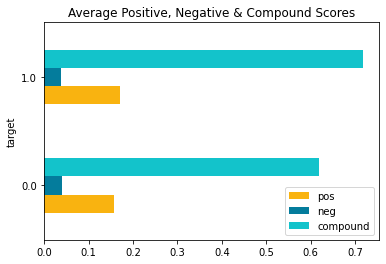

In [143]:
df_sentiment.groupby('target').mean()[['pos', 'neg', 'compound']].plot(kind='barh')
plt.title('Average Positive, Negative & Compound Scores');

Sentiment In both subreddits are extreamely similar. For this reason the sentiment does not appear to be a good predictor of the subreddit. This also confirms how the two categories are similar, in the use that users do of the subreddit and the tone with wich they discuss topics.